In [138]:
# https://irma.nps.gov/Stats/SSRSReports/Park%20Specific%20Reports/Traffic%20Counts?Park=YOSE
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
idx = pd.IndexSlice

In [4]:
# Creating lists of visitors and year, data is alternating 
file = '../datasets/Yosemite_Visitors.txt'
years = []
visitors = []
with open (file, 'r') as f:
    for i in range(226):
        line = f.readline().strip('\n').replace(',','')
        if i % 2 == 0:
            years.append(line)
        else:
            visitors.append(line)

In [5]:
# Creating dataframe
years_df = pd.DataFrame(years)
visitors_df = pd.DataFrame(visitors)
yosemite_df = pd.concat([years_df,visitors_df], axis=1)

#Setting 0th row as columns, then dropping from dataset, also dropping Total
yosemite_df.columns = yosemite_df.iloc[0]
yosemite_df = yosemite_df.drop(0)
yosemite_df = yosemite_df.drop(112)
yosemite_df.columns = (['Year', 'Visitors'])
yosemite_df.head()

yosemite_df.Year = yosemite_df.Year.astype(int)
yosemite_df.Visitors = yosemite_df.Visitors.astype(int)
yosemite_df = yosemite_df.set_index('Year')

In [57]:
yosemite_df.describe()

,Visitors
count,1.110000e+02
mean,1.715356e+06
std,1.437952e+06
min,5.414000e+03
25%,4.017545e+05
50%,1.227100e+06
75%,3.184478e+06
max,5.028868e+06


In [61]:
yosemite_df.head()

,Visitors
Year,
1906,5414
1907,7102
1908,8850
1909,13182
1910,13619


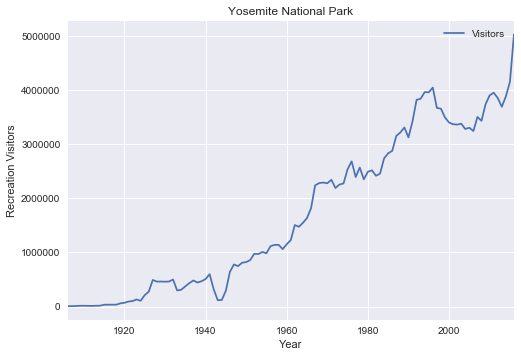

In [53]:
plt.clf()
yosemite_df.plot()
plt.ylabel('Recreation Visitors')
plt.title('Yosemite National Park')
plt.show()

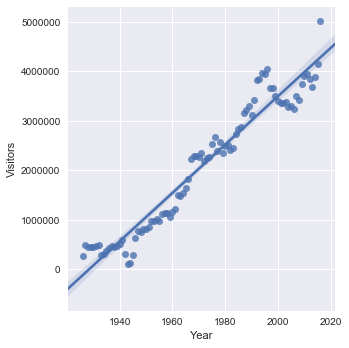

In [69]:
sns.lmplot(x='Year',y='Visitors', data=yosemite_df.iloc[20:].reset_index())
plt.show()

In [9]:
yosemite_locales = pd.read_csv('../datasets/Traffic Counts.csv', skiprows=(0,1))
yosemite_locales = yosemite_locales.set_index(['GroupDescription', 'Year'])

In [10]:
yosemite_locales = yosemite_locales.fillna(0)

In [11]:
for i in yosemite_locales.index:
    row = yosemite_locales.loc[i]
    for x in range(len(row)):
        num = row[x]
        if type(num) == str:
            num = num.replace(',', '')
            row[x] = (int(num))

In [12]:
def remove_traffic(description):
   return description.replace('TRAFFIC COUNT AT ',"") 

In [114]:
# Setting index and removing 'Traffic count at'

yosemite_locales = yosemite_locales.reset_index()
yosemite_locales.GroupDescription = yosemite_locales.GroupDescription.apply(remove_traffic)
yosemite_locales = yosemite_locales.reset_index().apply(remove_traffic).set_index(['GroupDescription', 'Year'])
del yosemite_locales['index']
del yosemite_locales['level_0']

In [116]:
yosemite_locales.head()

JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG  \
GroupDescription Year                                                           
ARCH ROCK        2017  20184  24206  46112  66498  67532  57925  57547  57367   
                 2016  21728  26196  32769  38821  52689  58480  60143  54744   
                 2015  19875  19574  28666  35198  45677  49450  48671  49004   
                 2014  16919  16924  21754  32520  44950  45000  56355  49472   
                 2013  16634  17536  25560  30371  44950  45000  50987  55726   

                         SEP    OCT    NOV    DEC  
GroupDescription Year                              
ARCH ROCK        2017  63136      0      0      0  
                 2016  52947  43187  28816  23811  
                 2015  43376  36641  24772  23412  
                 2014  40474  29344  23857  21975  
                 2013  40552  20237  22968  18484

In [121]:
yosemite_locales.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,231.00000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,7792.04329,8229.069264,10248.069264,14003.008658,23213.367965,31436.909091,39983.043290,40900.017316,30496.601732,21529.064935,9849.086580,7517.870130
std,7595.42761,8178.215817,9632.430884,13230.900734,17992.621023,18007.839636,20036.247148,20639.016961,15598.320787,12219.285146,8884.644397,7284.322624
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,266.50000,420.500000,545.500000,1500.000000,5050.500000,21231.000000,28665.500000,29065.000000,21127.500000,15336.000000,1144.000000,338.000000
50%,7022.00000,6995.000000,9921.000000,11565.000000,21339.000000,32352.000000,44950.000000,45208.000000,33750.000000,23250.000000,7928.000000,6410.000000
75%,14511.50000,14746.500000,17884.000000,25277.000000,40035.500000,44462.500000,51150.000000,55436.500000,42101.500000,30028.000000,17544.000000,13598.500000
max,43357.00000,39682.000000,56816.000000,66498.000000,67642.000000,80486.000000,98308.000000,89027.000000,63958.000000,76670.000000,40350.000000,23811.000000


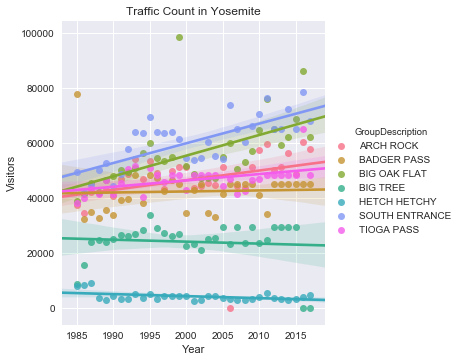

In [119]:
plt.clf()
sns.lmplot(x='Year', y='JUL', data=yosemite_locales.reset_index(), hue='GroupDescription')
plt.title('Traffic Count in Yosemite')
plt.ylabel('Visitors')
plt.show()

In [ ]:
# Entrances: 
Hetch Hetchy-Northern most
Big Oak- near AR  --> tunnel view
Arch Rock- near BO --> tunnel view
South Entrance --> LA/SD southern
Tioga PAss --> eastern entrance - nevada, tahoe, death valley. open may-> oct

Badger Pass --> Ski Area - discard from main data gathering
Big Tree --> Wawona? Not an entrance

In [ ]:
yosemite

In [178]:
yosemite_locales.loc[['ARCH ROCK']]

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
Year,,,,,,,,,,,,
2017,20184,24206,46112,66498,67532,57925,57547,57367,63136,0,0,0
2016,21728,26196,32769,38821,52689,58480,60143,54744,52947,43187,28816,23811
2015,19875,19574,28666,35198,45677,49450,48671,49004,43376,36641,24772,23412
2014,16919,16924,21754,32520,44950,45000,56355,49472,40474,29344,23857,21975
2013,16634,17536,25560,30371,44950,45000,50987,55726,40552,20237,22968,18484
2012,18387,17877,23422,33551,45200,49717,50002,49600,38196,28858,19275,17383
2011,17128,17345,19730,31500,44950,56213,59327,54471,44896,37061,22218,18149
2010,15385,16482,22692,29365,45513,56830,57350,51946,46205,34755,21411,15627
2009,15440,14002,20361,29003,42580,47773,51030,49969,43796,34237,21837,17474


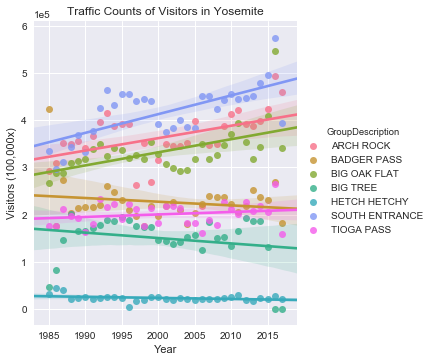

In [125]:
sns.lmplot(x='Year', y='Visitors', data=pd.DataFrame(yosemite_locales.sum(axis=1), columns=['Visitors']).reset_index(), hue='GroupDescription')
plt.title('Traffic Counts of Visitors in Yosemite')
plt.ticklabel_format(axis='y', style='sci', scilimits=(10,4))
plt.ylabel('Visitors (100,000x)')
plt.show()

# Check years 1990-2005

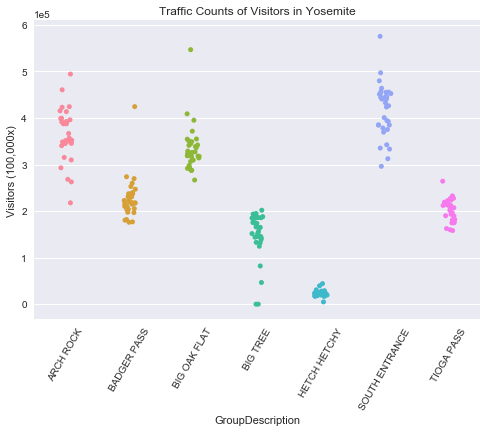

In [126]:
sns.stripplot(x='GroupDescription', y='Visitors', data=pd.DataFrame(yosemite_locales.sum(axis=1), columns=['Visitors']).reset_index(), jitter=True)
plt.title('Traffic Counts of Visitors in Yosemite')
plt.ticklabel_format(axis='y', style='sci', scilimits=(10,4))
plt.ylabel('Visitors (100,000x)')
plt.xticks(rotation=60)
plt.show()

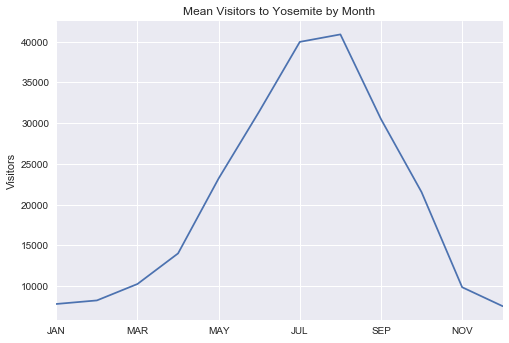

In [17]:
yosemite_locales.mean().plot()
plt.title('Mean Visitors to Yosemite by Month')
plt.ylabel('Visitors')
plt.show()

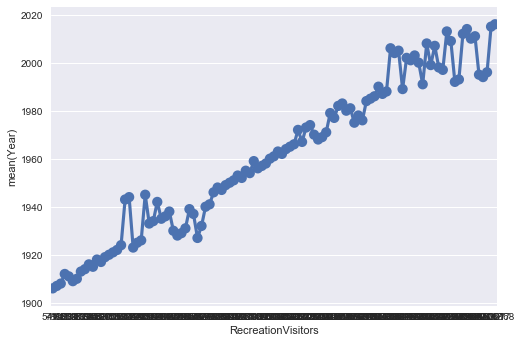

In [50]:
plt.clf()
sns.pointplot(x="RecreationVisitors", y="Year", data = all_data.loc['Yosemite NP'].reset_index())
plt.show()

In [177]:
(yosemite_locales.loc[idx['BIG OAK FLAT']])

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
Year,,,,,,,,,,,,
2017,9623,8838,3807,9043,50361,70602,62000,72143,55575,0,0,0
2016,11484,16737,21092,33858,55779,69033,86083,75156,63958,76670,22421,14533
2015,6975,8400,16275,27305,48629,56726,68724,64515,48137,38434,13500,11323
2014,8920,8400,16275,25500,32550,46500,62000,58900,31500,31000,13500,9300
2013,6975,8400,16275,23471,43298,50773,59164,22800,31500,31000,15167,9265
2012,8451,6931,7123,22910,41702,54525,65081,60352,40605,26312,11154,9300
2011,7782,6946,7548,24025,40870,60856,75667,66429,50263,33233,11207,10352
2010,6975,8400,16275,25500,43752,46500,64618,61153,47364,31000,12674,7423
2009,7678,5426,11778,23912,43186,48083,56955,59502,35866,32813,13500,9300


In [141]:
help(idx)

Help on _IndexSlice in module pandas.core.indexing object:

class _IndexSlice(builtins.object)
 |  Create an object to more easily perform multi-index slicing
 |  
 |  Examples
 |  --------
 |  
 |  >>> midx = pd.MultiIndex.from_product([['A0','A1'], ['B0','B1','B2','B3']])
 |  >>> columns = ['foo', 'bar']
 |  >>> dfmi = pd.DataFrame(np.arange(16).reshape((len(midx), len(columns))),
 |                          index=midx, columns=columns)
 |  
 |  Using the default slice command:
 |  
 |  >>> dfmi.loc[(slice(None), slice('B0', 'B1')), :]
 |             foo  bar
 |      A0 B0    0    1
 |         B1    2    3
 |      A1 B0    8    9
 |         B1   10   11
 |  
 |  Using the IndexSlice class for a more intuitive command:
 |  
 |  >>> idx = pd.IndexSlice
 |  >>> dfmi.loc[idx[:, 'B0':'B1'], :]
 |             foo  bar
 |      A0 B0    0    1
 |         B1    2    3
 |      A1 B0    8    9
 |         B1   10   11
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, arg)
 |  
 |  ------